<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# web location:
web_csv = 'https://raw.githubusercontent.com/josephofiowa/GA-DSI/master/NHL_Data_GA.csv'
local_csv = './datasets/NHL_Data_GA.csv'

### 1. Load the NHL data

In [3]:
# A:
nhl = pd.read_csv(local_csv)

### 2. Perform any required data cleaning. Do some EDA.

In [4]:
# A: 
nhl.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


In [5]:
nhl.dtypes

Team     object
PTS       int64
Rank      int64
TOI      object
GF        int64
GA        int64
GF60    float64
GA60    float64
GF%     float64
SF        int64
SA        int64
SF60    float64
SA60    float64
SF%     float64
FF        int64
FA        int64
FF60    float64
FA60    float64
FF%     float64
CF        int64
CA        int64
CF60    float64
CA60    float64
CF%     float64
Sh%     float64
Sv%     float64
PDO       int64
PIM       int64
dtype: object

In [14]:
nhl.shape

(90, 28)

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [6]:
# A: find count of Rank classes

nhl.groupby('Rank').size()


target = nhl['Rank'].values

### 4. What is the baseline accuracy?

In [7]:
# A:

pd.Series(target).value_counts()/len(target)

3    0.344444
2    0.333333
1    0.322222
dtype: float64

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [8]:
# A:

nhl.corr()

#GF%, CF%, PTS, GA

nhl_4f = nhl[['PTS', 'GA','GF%', 'CF%']]

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [9]:
# A:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(nhl_4f, target)

nhl_sample = nhl_4f.sample(5)
print "prediction:", knn.predict(nhl_sample)
print "actual:", target[nhl_sample.index]

prediction: [3 2 1 2 3]
actual: [3 2 1 2 3]


### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [10]:
# A:

knn.score(nhl_4f, target)

0.94444444444444442

In [17]:
for k in range(1,30)[::-1]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(nhl_4f, target)
    print (k, knn.score(nhl_4f,target))

(29, 0.8666666666666667)
(28, 0.87777777777777777)
(27, 0.87777777777777777)
(26, 0.91111111111111109)
(25, 0.88888888888888884)
(24, 0.91111111111111109)
(23, 0.91111111111111109)
(22, 0.93333333333333335)
(21, 0.91111111111111109)
(20, 0.93333333333333335)
(19, 0.92222222222222228)
(18, 0.94444444444444442)
(17, 0.93333333333333335)
(16, 0.93333333333333335)
(15, 0.92222222222222228)
(14, 0.93333333333333335)
(13, 0.92222222222222228)
(12, 0.93333333333333335)
(11, 0.91111111111111109)
(10, 0.91111111111111109)
(9, 0.92222222222222228)
(8, 0.93333333333333335)
(7, 0.93333333333333335)
(6, 0.94444444444444442)
(5, 0.94444444444444442)
(4, 0.94444444444444442)
(3, 0.9555555555555556)
(2, 0.93333333333333335)
(1, 1.0)


### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [25]:
# A:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(nhl_4f, target, test_size = 0.5)

for k in range(1,30)[::-1]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print (k, knn.score(X_test,y_test))


(29, 0.44444444444444442)
(28, 0.44444444444444442)
(27, 0.42222222222222222)
(26, 0.57777777777777772)
(25, 0.59999999999999998)
(24, 0.62222222222222223)
(23, 0.64444444444444449)
(22, 0.66666666666666663)
(21, 0.66666666666666663)
(20, 0.73333333333333328)
(19, 0.71111111111111114)
(18, 0.71111111111111114)
(17, 0.71111111111111114)
(16, 0.71111111111111114)
(15, 0.75555555555555554)
(14, 0.77777777777777779)
(13, 0.84444444444444444)
(12, 0.82222222222222219)
(11, 0.82222222222222219)
(10, 0.8666666666666667)
(9, 0.93333333333333335)
(8, 0.91111111111111109)
(7, 0.9555555555555556)
(6, 0.88888888888888884)
(5, 0.9555555555555556)
(4, 0.88888888888888884)
(3, 0.93333333333333335)
(2, 0.91111111111111109)
(1, 0.93333333333333335)


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [19]:
# A:
knn = KNeighborsClassifier(n_neighbors=90)
knn.fit(nhl_4f, target)
print knn.score(nhl_4f, target)


0.344444444444


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [20]:
# A:
for k in range(1,90)[::-1]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(nhl_4f, target)
    print (k, knn.score(nhl_4f,target))

(89, 0.58888888888888891)
(88, 0.62222222222222223)
(87, 0.58888888888888891)
(86, 0.58888888888888891)
(85, 0.61111111111111116)
(84, 0.58888888888888891)
(83, 0.59999999999999998)
(82, 0.56666666666666665)
(81, 0.55555555555555558)
(80, 0.53333333333333333)
(79, 0.55555555555555558)
(78, 0.55555555555555558)
(77, 0.56666666666666665)
(76, 0.52222222222222225)
(75, 0.52222222222222225)
(74, 0.52222222222222225)
(73, 0.52222222222222225)
(72, 0.5444444444444444)
(71, 0.56666666666666665)
(70, 0.62222222222222223)
(69, 0.65555555555555556)
(68, 0.66666666666666663)
(67, 0.69999999999999996)
(66, 0.69999999999999996)
(65, 0.68888888888888888)
(64, 0.69999999999999996)
(63, 0.67777777777777781)
(62, 0.69999999999999996)
(61, 0.71111111111111114)
(60, 0.77777777777777779)
(59, 0.77777777777777779)
(58, 0.77777777777777779)
(57, 0.81111111111111112)
(56, 0.78888888888888886)
(55, 0.81111111111111112)
(54, 0.80000000000000004)
(53, 0.82222222222222219)
(52, 0.80000000000000004)
(51, 0.844444

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

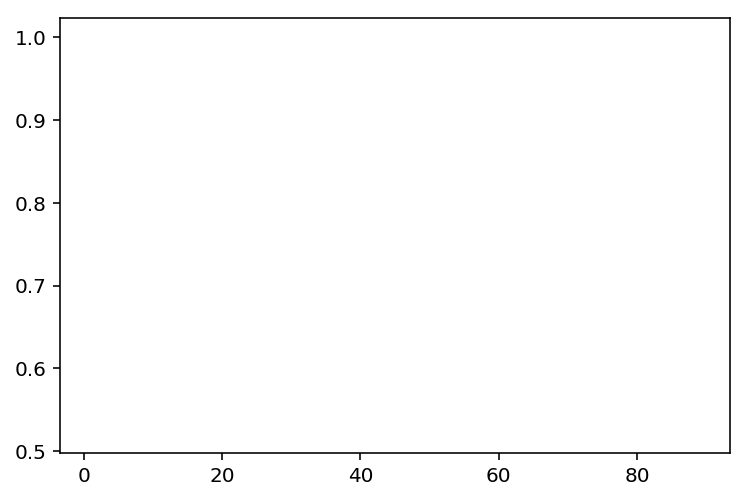

In [43]:
# A:
for k in range(1,90)[::-1]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(nhl_4f, target)
    knn_score = knn.score(nhl_4f,target)
    plt.plot(k, knn_score)
  

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [14]:
# A: